In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.2 pynndescent==0.5.12


In [6]:
results_file = 'tabula-muris-senis-facs-processed-official-annotations.h5ad'#'./tabula-muris-senis-bbknn-processed-official-annotations.h5ad'

In [7]:
adata = sc.read(results_file)

/home/kojima/anaconda3/envs/singlecell/lib/python3.10/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/kojima/anaconda3/envs/singlecell/lib/python3.10/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [8]:
adata

AnnData object with n_obs × n_vars = 110824 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'leiden', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'tissue_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [9]:
adata.obs

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B000497_B009023_S10.mm10-plus-0-0,Multiple,18m,A10_B000497,bulge keratinocyte,nan,nan,facs,18_53_M,male,nan,Skin,2706,1009830.0,10,9
A10_B000756_B007446_S10.mm10-plus-0-0,Viable,18m,A10_B000756,pancreatic B cell,nan,pancreatic B cell,facs,18_45_M,male,Endocrine,Pancreas,3212,978772.0,31,27
A10_B000802_B009022_S10.mm10-plus-0-0,Multiple,18m,A10_B000802,bulge keratinocyte,nan,outer bulge,facs,18_47_F,female,Skin Anagen,Skin,2243,419722.0,10,9
A10_B000927_B007456_S10.mm10-plus-0-0,"CD31+, CD45+, CD31-CD45-Sca1+, CD31-CD45-Sca1-...",18m,A10_B000927,skeletal muscle satellite cell,nan,nan,facs,18_46_F,female,Muscle Diaphragm,Limb_Muscle,2789,878950.0,12,11
A10_B001361_B007505_S10.mm10-plus-0-0,Viable,18m,A10_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1237,6587.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8_MAA001690_S20.mus-2-1,Multiple,21m,P8_MAA001690_S20.mus,basal cell,NA,basal cell,facs,21_54_F,female,Mammary_Gland,Mammary_Gland,3523,146922.0,22,20
P8_MAA001700_S104.mus-2-1,Multiple,21m,P8_MAA001700_S104.mus,basal cell,NA,basal cell,facs,21_55_F,female,Mammary_Gland,Mammary_Gland,4476,1027535.0,22,20
P9_B000485_S69.mus-2-1,Multiple,18m,P9_B000485_S69.mus,basal cell,NA,basal cell,facs,18_47_F,female,Mammary_Gland,Mammary_Gland,2980,1184061.0,22,20


In [10]:
adata.var

,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610005C13Rik,3939,0.070060,2.193134,0.135853,False
0610007C21Rik,61891,0.990046,2.093357,-0.572054,False
0610007L01Rik,36115,0.394587,1.682325,-0.799145,False
0610007N19Rik,19591,0.116846,1.528021,-0.509538,False
0610007P08Rik,12581,0.093662,1.588233,-0.451112,False
...,...,...,...,...,...
Zyg11a,276,0.001672,1.983074,-0.067978,False
Zyg11b,23165,0.194121,1.803907,-0.241832,False
Zyx,58021,0.970459,2.498557,-0.159065,False


In [11]:
adata.var[adata.var["highly_variable"]==True]

,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610010O12Rik,29218,0.577405,3.226178,1.188947,True
0610040J01Rik,18694,0.435711,2.833868,0.683751,True
1100001G20Rik,8493,0.290526,2.737198,0.663785,True
1110002N22Rik,9498,0.143120,3.002187,0.920917,True
1110012J17Rik,4485,0.033040,2.646098,0.575387,True
...,...,...,...,...,...
Zmiz1,46790,0.470275,3.743103,1.854614,True
Zranb1,23041,0.220936,2.801522,0.726203,True
Zscan20,1705,0.018568,2.860374,0.783309,True


In [16]:
adata_D=adata[:,adata.var["highly_variable"]==True]

In [17]:
adata_D.var

,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610010O12Rik,29218,0.577405,3.226178,1.188947,True
0610040J01Rik,18694,0.435711,2.833868,0.683751,True
1100001G20Rik,8493,0.290526,2.737198,0.663785,True
1110002N22Rik,9498,0.143120,3.002187,0.920917,True
1110012J17Rik,4485,0.033040,2.646098,0.575387,True
...,...,...,...,...,...
Zmiz1,46790,0.470275,3.743103,1.854614,True
Zranb1,23041,0.220936,2.801522,0.726203,True
Zscan20,1705,0.018568,2.860374,0.783309,True


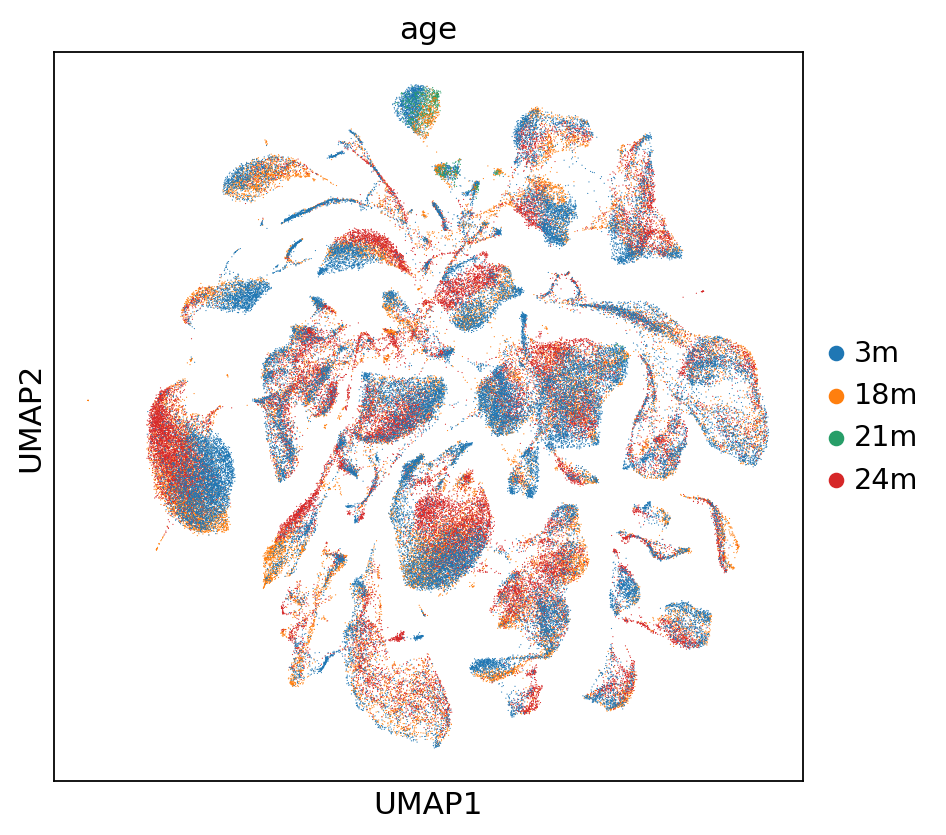

In [22]:
# Inital setting for plot size
from matplotlib import rcParams

FIGSIZE = (6, 6)
rcParams["figure.figsize"] = FIGSIZE

sc.pl.umap(adata_D, color="age")
#sc.pl.umap(adata_D, color=["batch", "louvain"])

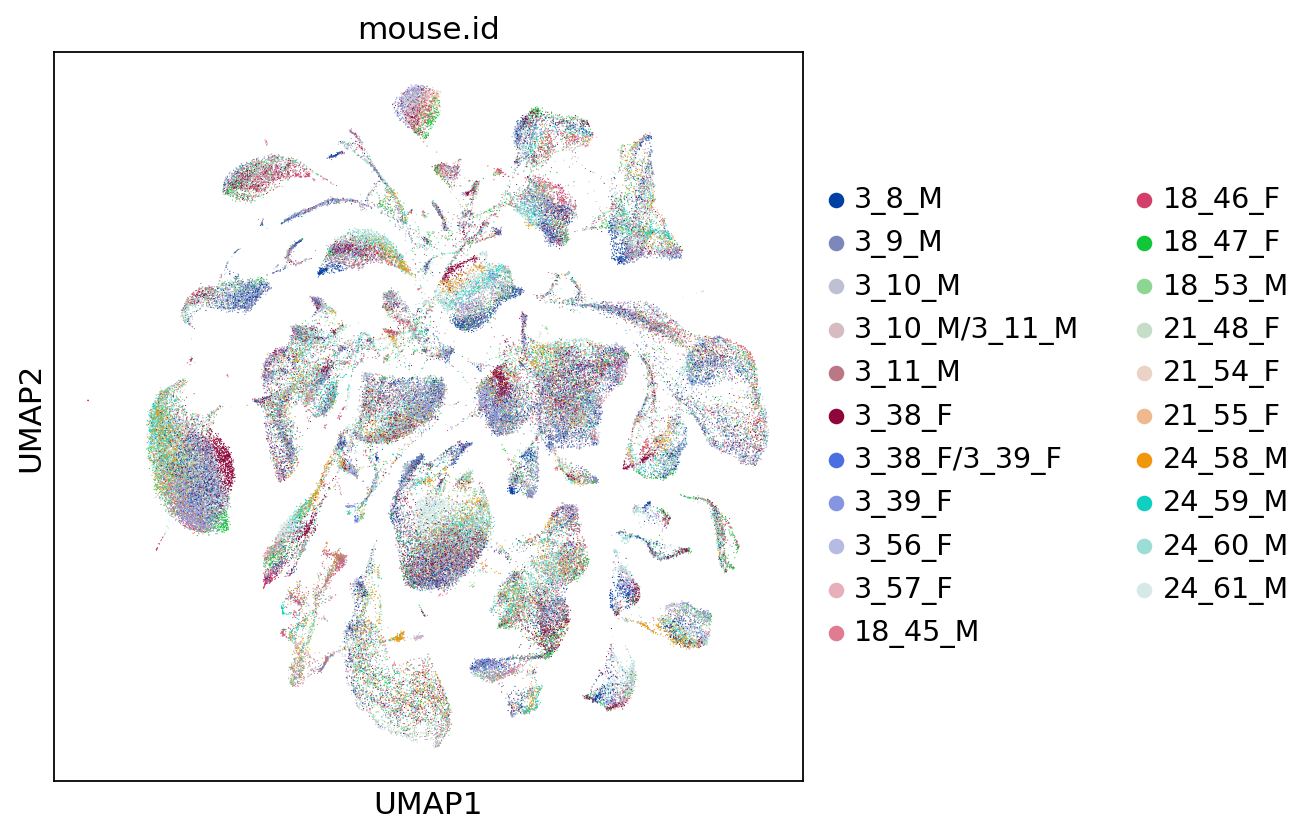

In [23]:
sc.pl.umap(adata_D, color="mouse.id")

the obs value 'cell_ontology_class' has more than 103 categories. Uniform 'grey' color will be used for all categories.


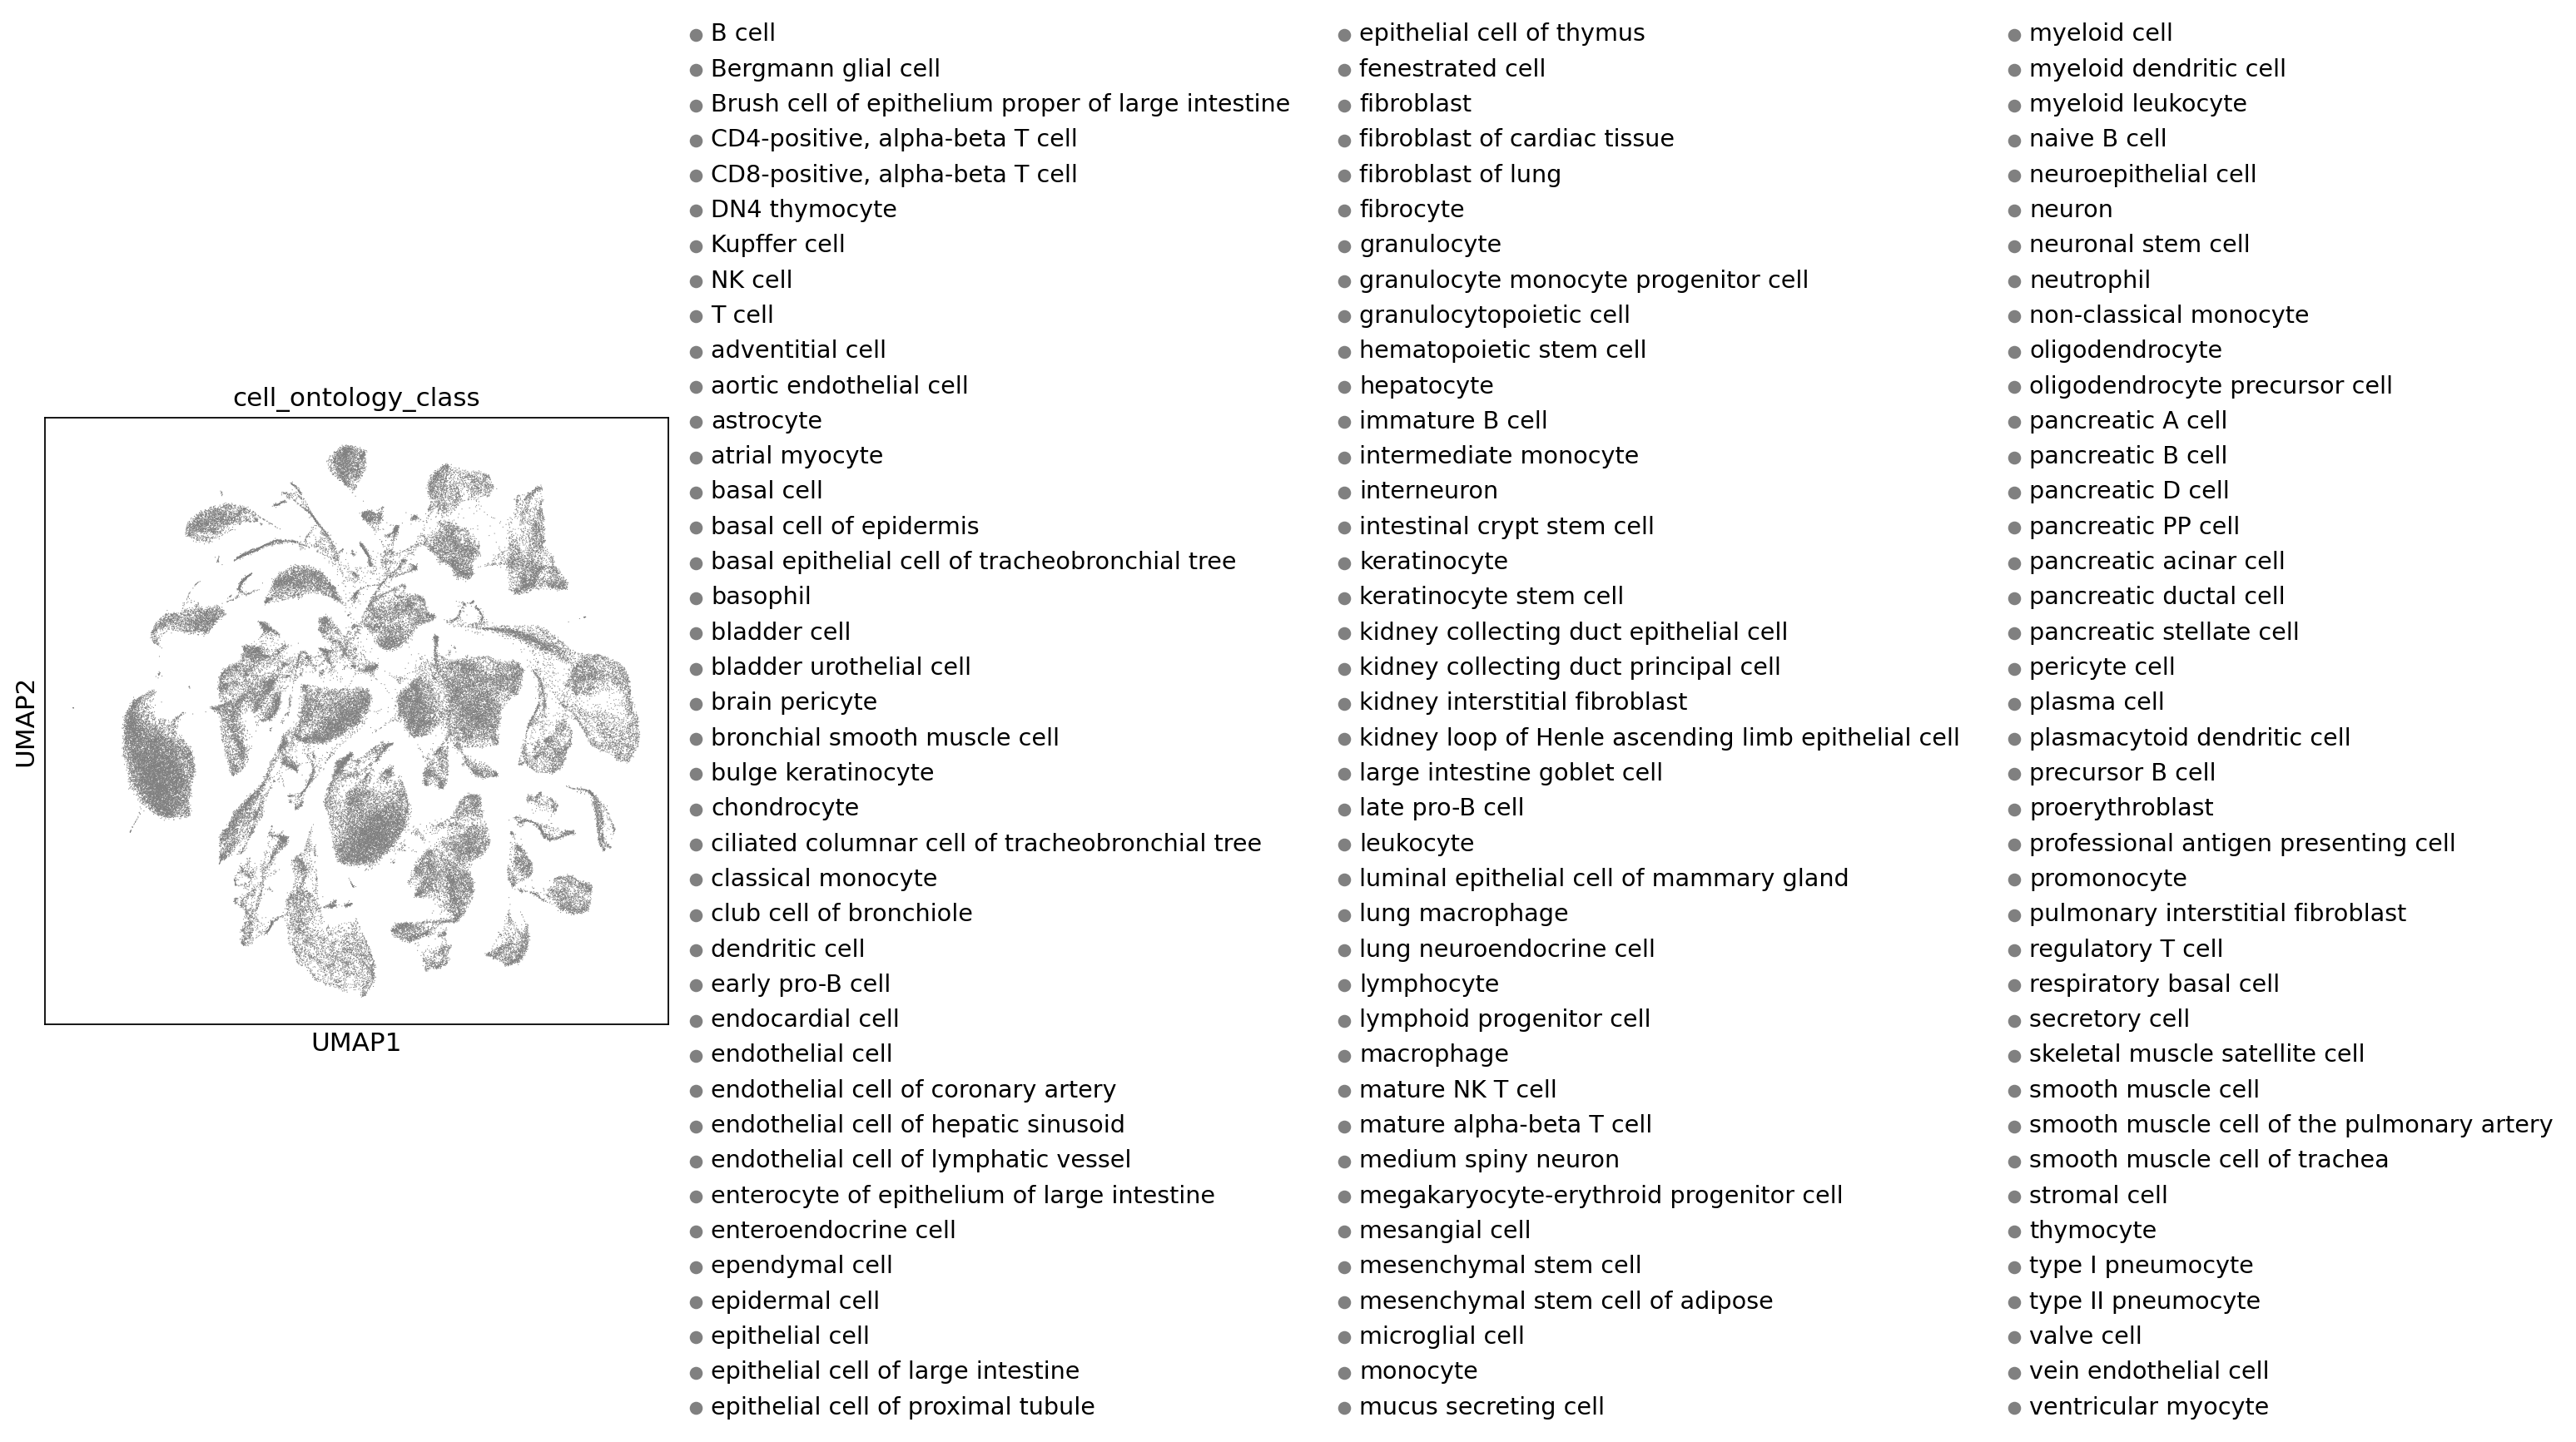

In [24]:
sc.pl.umap(adata_D, color="cell_ontology_class")

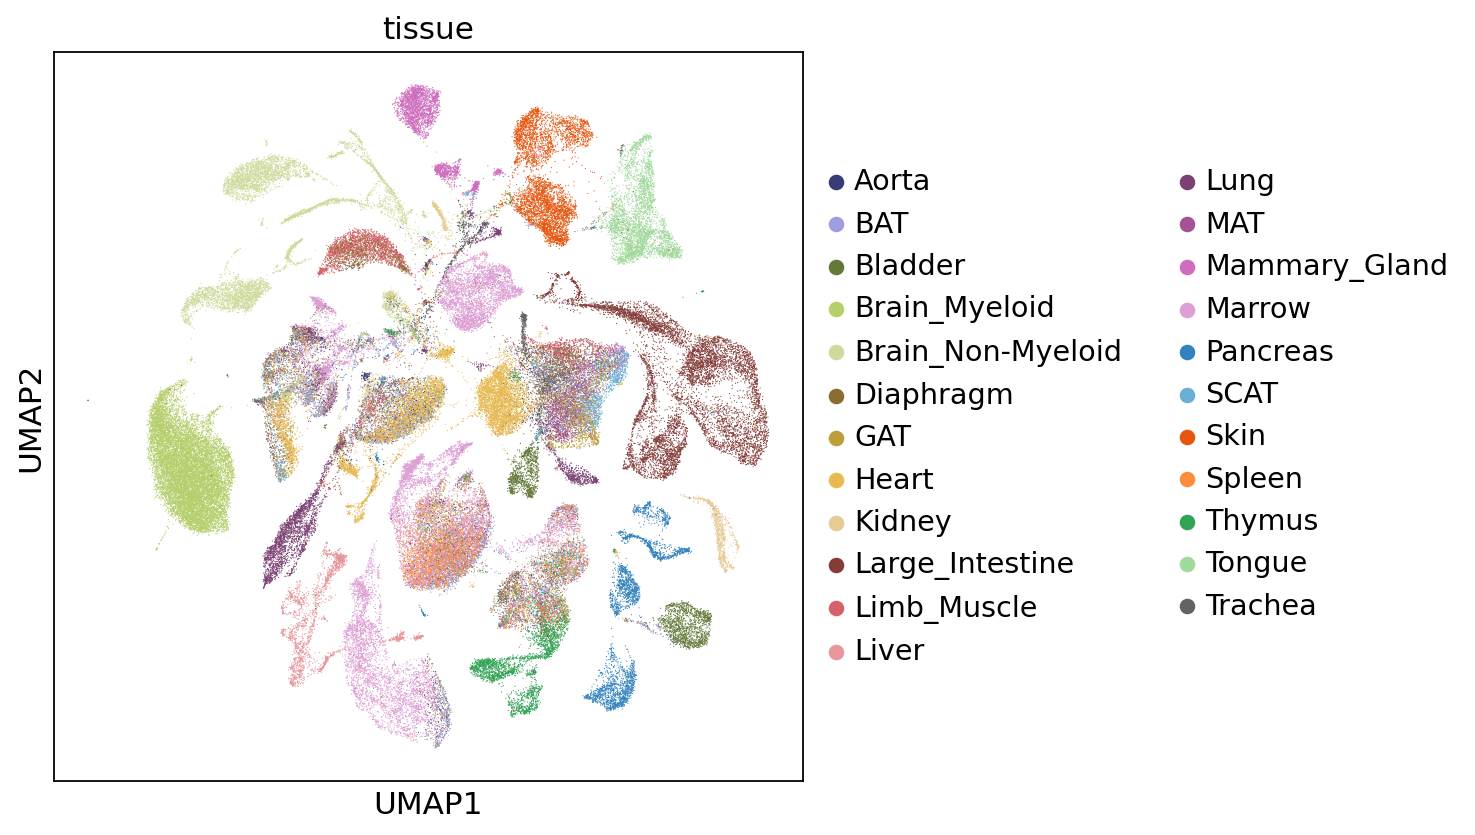

In [26]:
sc.pl.umap(adata_D, color="tissue")

In [42]:
print(len(adata.obs["tissue"].unique().tolist()))
#for el in adata.obs["tissue"].unique().tolist():
#    adata[obs["tissue"]==el, adata.var["highly_variable"]==True ]

23


In [35]:
Z=adata[adata.obs["tissue"]=='Skin', adata.var["highly_variable"]==True ]
Z

View of AnnData object with n_obs × n_vars = 4860 × 2855
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'tissue_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [36]:
Z.X.shape

(4860, 2855)

In [37]:
Z.obs

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B000497_B009023_S10.mm10-plus-0-0,Multiple,18m,A10_B000497,bulge keratinocyte,nan,nan,facs,18_53_M,male,nan,Skin,2706,1009830.0,10,9
A10_B000802_B009022_S10.mm10-plus-0-0,Multiple,18m,A10_B000802,bulge keratinocyte,nan,outer bulge,facs,18_47_F,female,Skin Anagen,Skin,2243,419722.0,10,9
A10_B002850_B007342_S10.mm10-plus-0-0,Multiple,18m,A10_B002850,bulge keratinocyte,nan,outer bulge,facs,18_47_F,female,nan,Skin,3731,1734592.0,10,9
A11_B000497_B009023_S11.mm10-plus-0-0,Multiple,18m,A11_B000497,bulge keratinocyte,nan,nan,facs,18_53_M,male,nan,Skin,2186,496482.0,10,9
A11_B000802_B009022_S11.mm10-plus-0-0,Multiple,18m,A11_B000802,bulge keratinocyte,nan,outer bulge,facs,18_47_F,female,Skin Anagen,Skin,3022,952957.0,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000549.3_8_M.1.1-1-1,nan,3m,P9.MAA000549.3_8_M.1.1,bulge keratinocyte,CL:0002337,outer bulge,facs,3_8_M,male,Anagen,Skin,3278,237221.0,10,9
P9.MAA000597.3_9_M.1.1-1-1,nan,3m,P9.MAA000597.3_9_M.1.1,bulge keratinocyte,CL:0002337,outer bulge,facs,3_9_M,male,Anagen,Skin,2746,339986.0,10,9
P9.MAA000614.3_10_M.1.1-1-1,nan,3m,P9.MAA000614.3_10_M.1.1,macrophage,CL:0000738,nan,facs,3_10_M,male,Telogen,Skin,2803,166435.0,4,4


In [41]:
len(Z.obs.cell.unique())

4860

In [53]:
a=Z.X.todense()
z=a[a>0]

(array([284974., 100388.,  82258.,  77438.,  76585.,  77745.,  77094.,
         74429.,  70907.,  66090.,  60649.,  55177.,  49480.,  44965.,
         40671.,  37043.,  33135.,  29840.,  26215.,  23648.,  21087.,
         18253.,  15700.,  13431.,  11382.,   9839.,   8479.,   7622.,
          6610.,   5854.,   5239.,   4631.,   4184.,   3754.,   3216.,
          3024.,   2879.,   2564.,   2299.,   2090.,   1900.,   1742.,
          1491.,   1474.,   1330.,   1365.,   1240.,   1169.,   1083.,
         17677.]),
 array([6.49586786e-04, 2.00636595e-01, 4.00623590e-01, 6.00610614e-01,
        8.00597608e-01, 1.00058460e+00, 1.20057166e+00, 1.40055859e+00,
        1.60054564e+00, 1.80053270e+00, 2.00051975e+00, 2.20050669e+00,
        2.40049362e+00, 2.60048079e+00, 2.80046773e+00, 3.00045466e+00,
        3.20044184e+00, 3.40042877e+00, 3.60041571e+00, 3.80040264e+00,
        4.00038958e+00, 4.20037699e+00, 4.40036392e+00, 4.60035086e+00,
        4.80033779e+00, 5.00032473e+00, 5.20031166e+

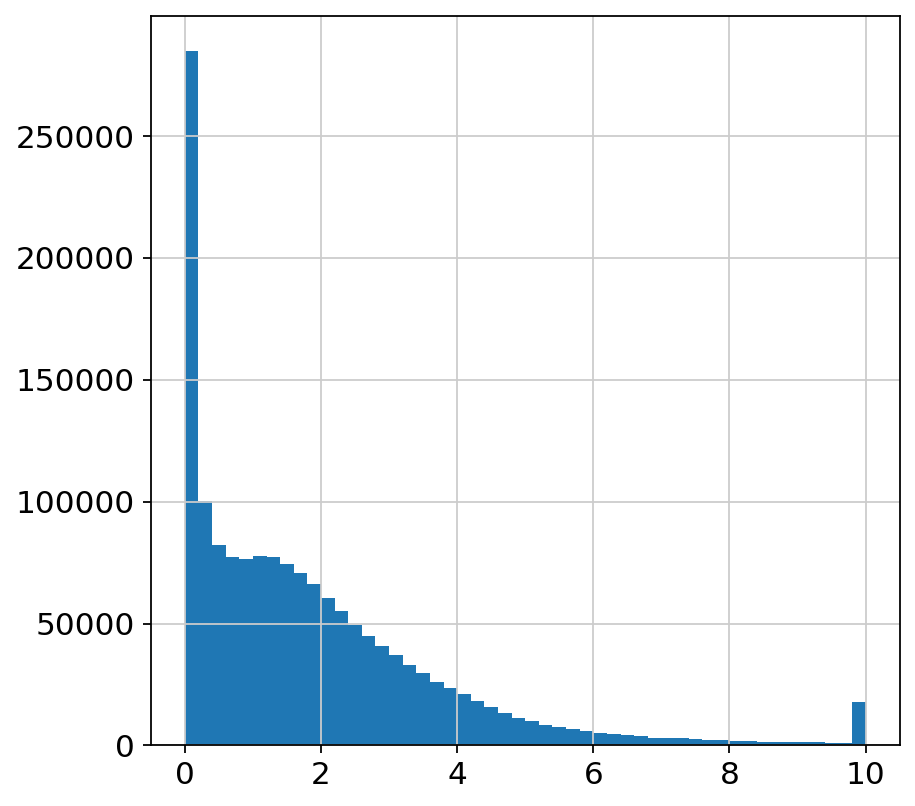

In [56]:
import matplotlib.pyplot as plt
plt.hist(np.ravel(z),bins=50)

In [76]:
Z.var.index.tolist()

['0610010O12Rik',
 '0610040J01Rik',
 '1100001G20Rik',
 '1110002N22Rik',
 '1110012J17Rik',
 '1110018G07Rik',
 '1110032A04Rik',
 '1110037F02Rik',
 '1190002H23Rik',
 '1300017J02Rik',
 '1300018I17Rik',
 '1500010J02Rik',
 '1500015O10Rik',
 '1600029D21Rik',
 '1700011H14Rik',
 '1700019D03Rik',
 '1700019L03Rik',
 '1700030C10Rik',
 '1810010D01Rik',
 '1810011O10Rik',
 '1810012P15Rik',
 '1810030J14Rik',
 '1810033B17Rik',
 '1810041L15Rik',
 '1810046K07Rik',
 '1810049H13Rik',
 '1810065E05Rik',
 '2010001M09Rik',
 '2010109I03Rik',
 '2200002D01Rik',
 '2210010C04Rik',
 '2210015D19Rik',
 '2210408F21Rik',
 '2210415F13Rik',
 '2300002M23Rik',
 '2310008H04Rik',
 '2310033P09Rik',
 '2310039H08Rik',
 '2310042D19Rik',
 '2310046O06Rik',
 '2310079G19Rik',
 '2410091C18Rik',
 '2510012J08Rik',
 '2610019F03Rik',
 '2610528A11Rik',
 '2610528J11Rik',
 '2700060E02Rik',
 '2700081O15Rik',
 '2700089E24Rik',
 '2810001G20Rik',
 '2810046L04Rik',
 '2810405K02Rik',
 '2900011O08Rik',
 '2900041M22Rik',
 '2900052N01Rik',
 '4632415L

In [77]:
a=Z.X.todense()
obs=(Z.obs["tissue"].astype(str)+"|"+Z.obs["age"].astype(str)+"|"+Z.obs.index.astype(str)).tolist()
col=Z.var.index.tolist()
with open("test.txt","w") as fp:
    h="@name\t"+"\t".join(col)
    fp.write(h)
    fp.write("\n")
    for i, el in enumerate(obs):
        v=a[i].tolist()[0]
        line=el+"\t"+"\t".join(map(str,v))
        fp.write(line)
        fp.write("\n")
